<a href="https://colab.research.google.com/github/nbilgee/git_exercise/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Execution of various methods

Keras provides 4 types of Reccurent layers. All but SimpleRNN are gated recurrent neural networks.

In [ ]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN,LSTM
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

In [ ]:
from keras.layers.convolutional import Conv3D
from keras.layers import LSTM
from keras.layers import BatchNormalization
import numpy as np
import pylab as plt
from keras.utils.data_utils import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


[Problem 1] Execution of various methods

In [ ]:
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/15
782/782 [==============================] - 317s 401ms/step - loss: 0.4252 - accuracy: 0.8026 - val_loss: 0.3783 - val_accuracy: 0.8302
Epoch 2/15
782/782 [==============================] - 275s 351ms/step - loss: 0.2517 - accuracy: 0.8997 - val_loss: 0.3981 - val_accuracy: 0.8208
Epoch 3/15
782/782 [==============================] - 278s 355ms/step - loss: 0.1690 - accuracy: 0.9358 - val_loss: 0.4298 - val_accuracy: 0.8307
Epoch 4/15
782/782 [==============================] - 281s 359ms/step - loss: 0.1109 - accuracy: 0.9601 - val_loss: 0.4966 - val_accuracy: 0.8246
Epoch 5/15
782/782 [==============================] - 268s 342ms/step - loss: 0.0739 - accuracy: 0.9740 - val_loss: 0.6367 - val_accuracy: 0.8139
Epoch 6/15
782/782 [==============================] - 288s 368ms/step - loss: 0.0597 - accuracy: 0.9798 - val_loss: 0.6536 - val_accuracy: 0.7944
Epoch 7/15
782/782 [==============================] - 280s 359ms/step - loss: 0.0448 - accuracy: 0.9

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
print('Build model Simple RNN')
simplernnmodel = Sequential()

simplernnmodel.add(Embedding(max_features, 128))
simplernnmodel.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
simplernnmodel.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
simplernnmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
simplernnmodel.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = simplernnmodel.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Simple RNN Test score:', score)
print('Simpke RNN Test accuracy:', acc)

Build model Simple RNN
Train...
Epoch 1/15
782/782 [==============================] - 86s 107ms/step - loss: 0.6928 - accuracy: 0.5370 - val_loss: 0.6752 - val_accuracy: 0.5568
Epoch 2/15
782/782 [==============================] - 83s 106ms/step - loss: 0.5980 - accuracy: 0.6661 - val_loss: 0.5418 - val_accuracy: 0.7575
Epoch 3/15
782/782 [==============================] - 83s 106ms/step - loss: 0.4857 - accuracy: 0.7704 - val_loss: 0.5374 - val_accuracy: 0.7396
Epoch 4/15
782/782 [==============================] - 86s 110ms/step - loss: 0.4205 - accuracy: 0.8178 - val_loss: 0.5036 - val_accuracy: 0.7835
Epoch 5/15
782/782 [==============================] - 84s 107ms/step - loss: 0.4088 - accuracy: 0.8178 - val_loss: 0.6224 - val_accuracy: 0.6498
Epoch 6/15
782/782 [==============================] - 86s 110ms/step - loss: 0.3888 - accuracy: 0.8333 - val_loss: 0.5077 - val_accuracy: 0.7592
Epoch 7/15
782/782 [==============================] - 84s 108ms/step - loss: 0.3293 - accuracy: 0.

In [ ]:
from keras.layers import GRU

In [ ]:
print('Build model GRU')
grumodel = Sequential()

grumodel.add(Embedding(max_features, 128))
grumodel.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
grumodel.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
grumodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
grumodel.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = grumodel.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('GRU Test score:', score)
print('GRU Test accuracy:', acc)


Build model GRU
Train...
Epoch 1/15
782/782 [==============================] - 229s 289ms/step - loss: 0.4406 - accuracy: 0.7844 - val_loss: 0.3564 - val_accuracy: 0.8447
Epoch 2/15
782/782 [==============================] - 243s 311ms/step - loss: 0.2427 - accuracy: 0.9036 - val_loss: 0.3829 - val_accuracy: 0.8333
Epoch 3/15
782/782 [==============================] - 244s 312ms/step - loss: 0.1409 - accuracy: 0.9477 - val_loss: 0.5163 - val_accuracy: 0.8262
Epoch 4/15
782/782 [==============================] - 251s 321ms/step - loss: 0.0771 - accuracy: 0.9728 - val_loss: 0.5336 - val_accuracy: 0.8274
Epoch 5/15
782/782 [==============================] - 246s 315ms/step - loss: 0.0424 - accuracy: 0.9849 - val_loss: 0.7038 - val_accuracy: 0.8209
Epoch 6/15
782/782 [==============================] - 222s 284ms/step - loss: 0.0263 - accuracy: 0.9912 - val_loss: 0.7653 - val_accuracy: 0.8244
Epoch 7/15
782/782 [==============================] - 220s 282ms/step - loss: 0.0171 - accuracy: 0.

SimpleRNN couldn't store past information long ago, and could only consider data connections at short time intervals. Simple RNN Test score: 0.5902312994003296 Simple RNN Test accuracy: 0.74235999584198

LSTM has a mechanism to store data, and it has become possible to consider the connection of data at long time intervals. Test score: 1.1524425745010376 Test accuracy: 0.8172000050544739

GRU is a model that simplifies LSTM. The input gate and the forgetting gate are integrated into one gate as an "update gate". GRU Test score: 1.4982067346572876 GRU Test accuracy: 0.8104000091552734

In [ ]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),dtype=np.float)
    for i in range(n_samples):
        n = np.random.randint(3, 8)
        for j in range(n):
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1
            w = np.random.randint(2, 4)
            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,x_shift - w - 1: x_shift + w + 1,y_shift - w - 1: y_shift + w + 1,0] += noise_f * 0.1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

noisy_movies, shifted_movies = generate_movies(n_samples=1200)

<ipython-input-14-907604a80ce2>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
<ipython-input-14-907604a80ce2>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),dtype=np.float)


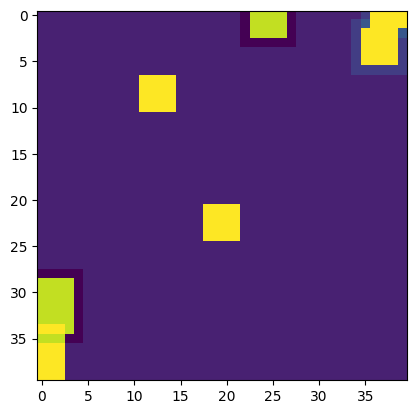

In [ ]:
index = 1
x = noisy_movies[index]
fig = plt.figure()
viewer = fig.add_subplot(111)
plt.ion()
fig.show()
for i in range(len(x)):
    viewer.clear()
    viewer.imshow(x[i])
    plt.pause(.1)
    fig.canvas.draw()

In [ ]:
from tensorflow.python.keras.layers import ConvLSTM2D

In [ ]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),input_shape=(None, 40, 40, 1),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),activation='sigmoid',padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

In [ ]:

seq.fit(noisy_movies[:100], shifted_movies[:100], batch_size=10,epochs=1, validation_split=0.05)

10/10 [==============================] - 261s 24s/step - loss: 0.8878 - val_loss: 0.7011


1/1 [==============================] - 1s 791ms/step


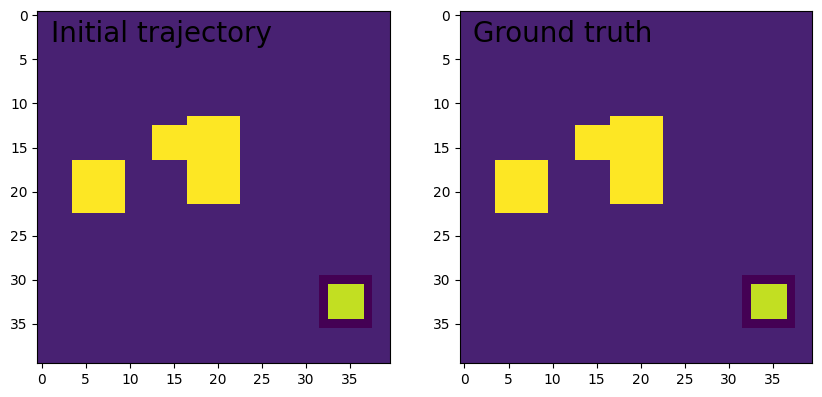

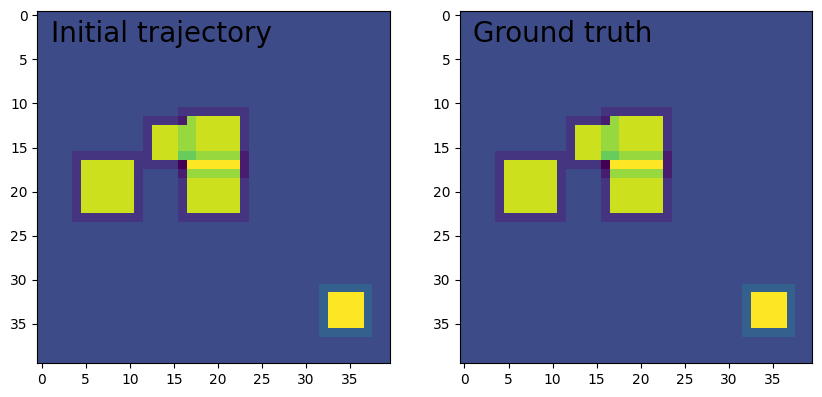

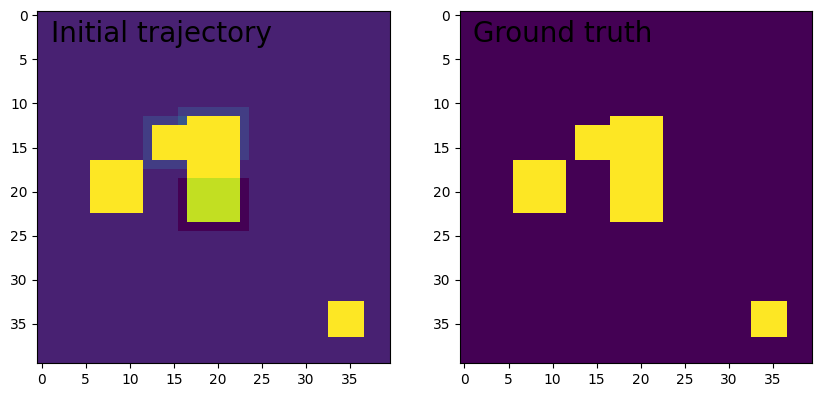

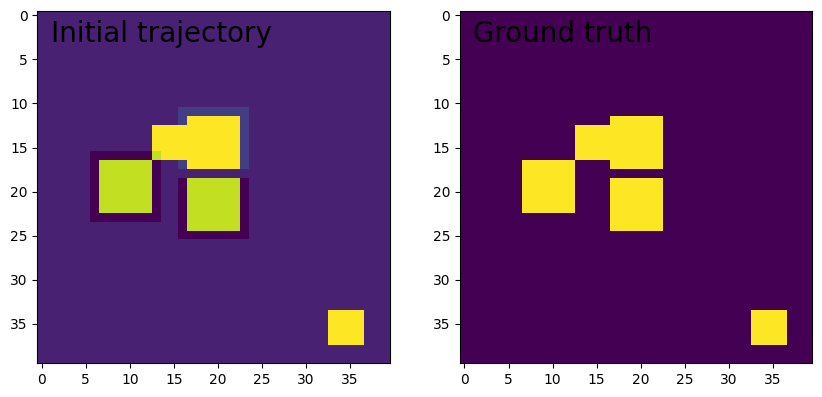

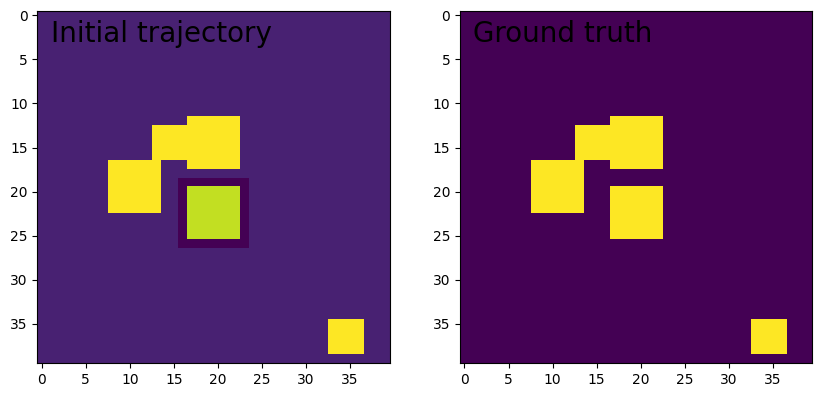

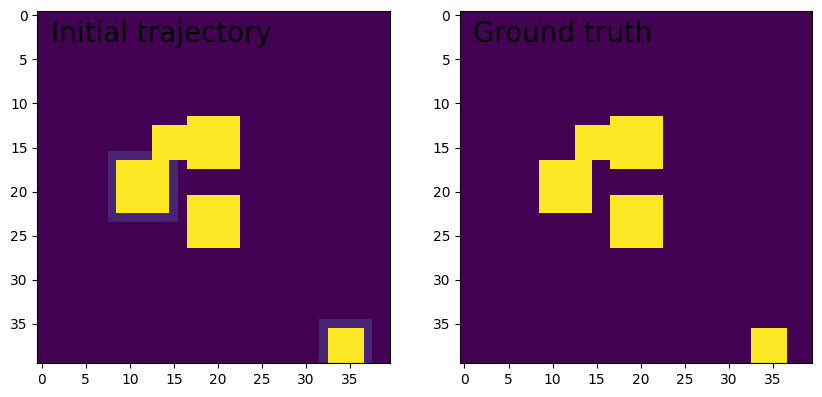

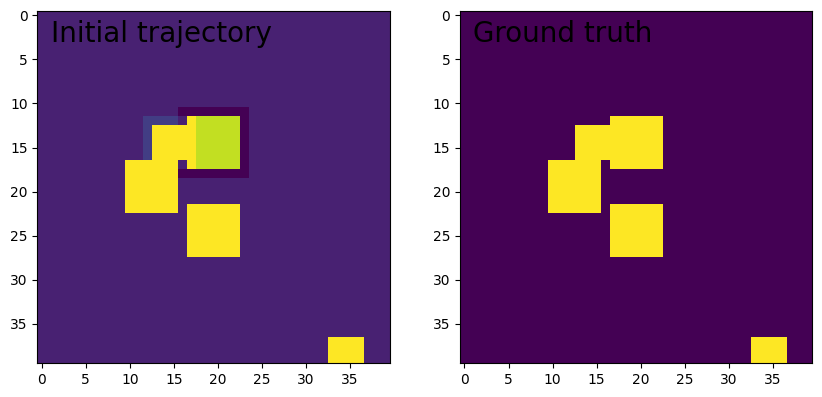

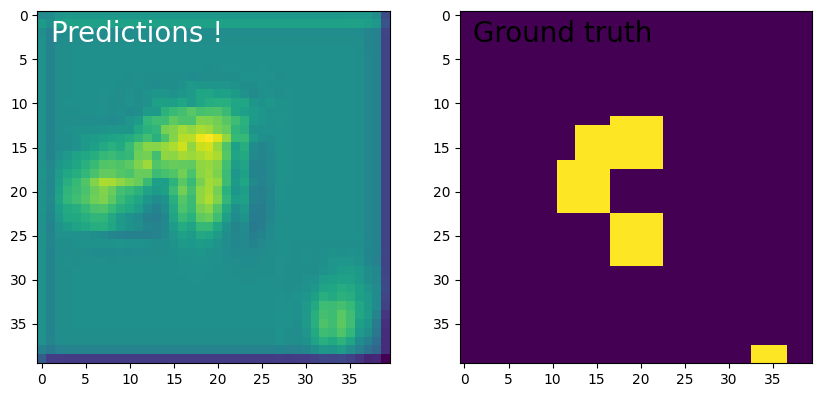

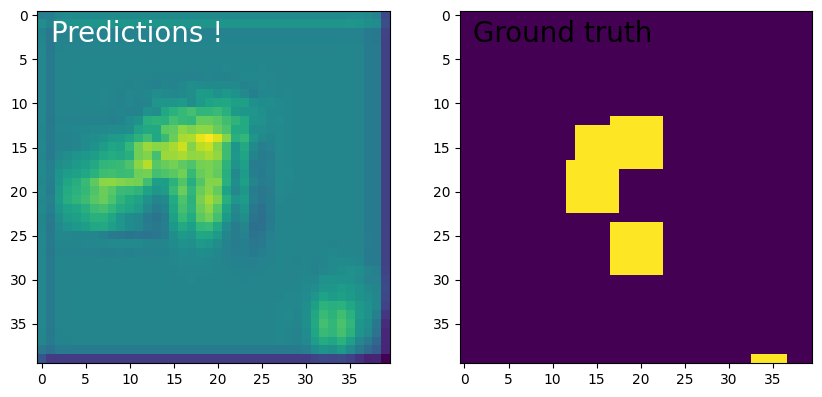

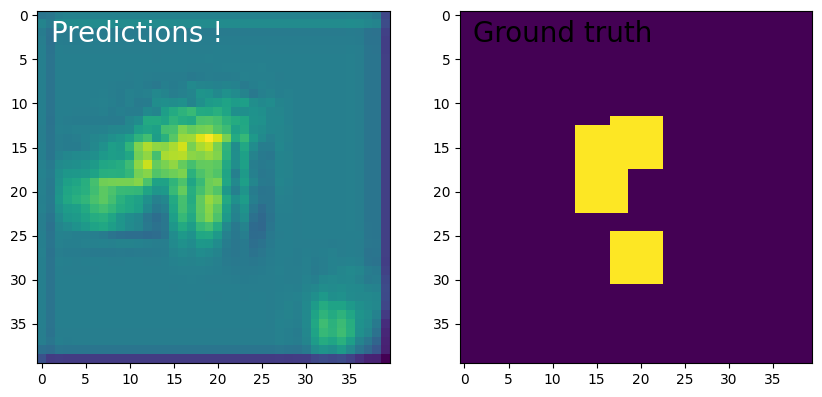

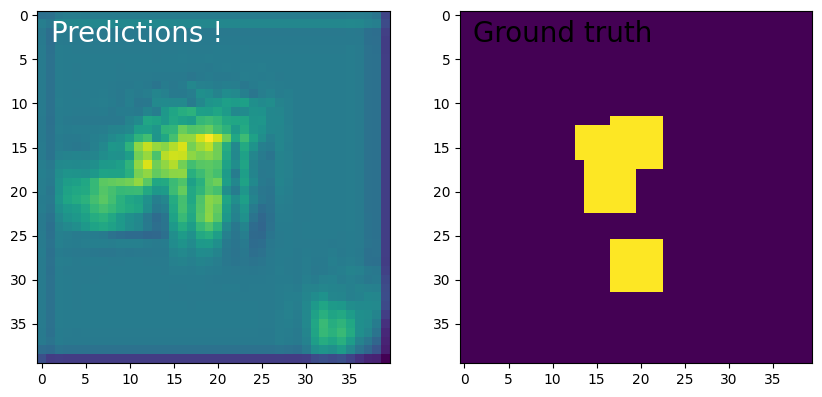

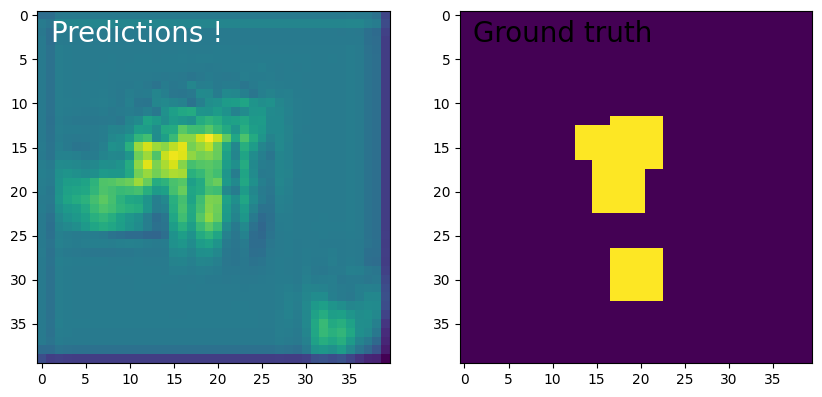

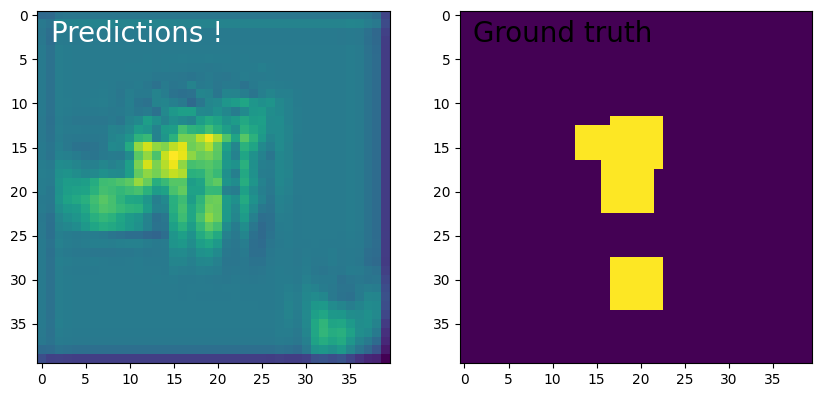

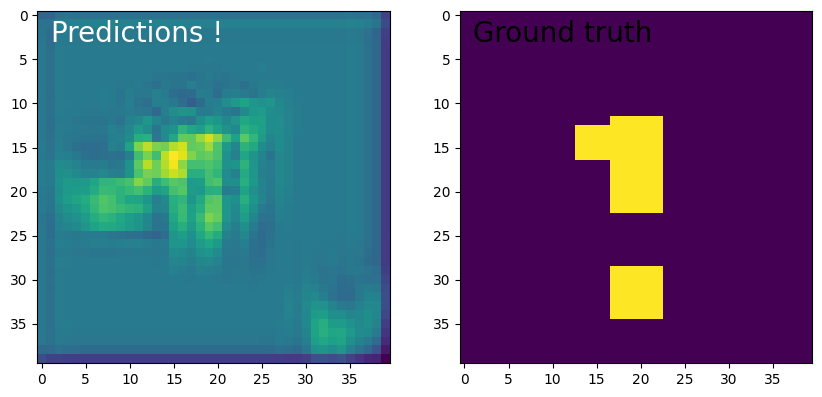

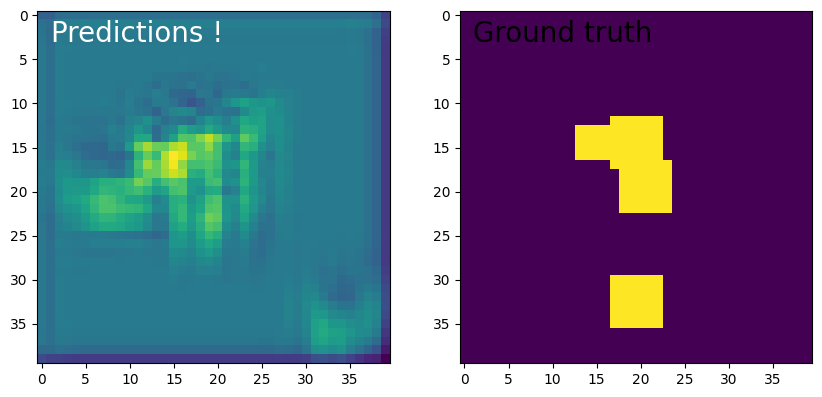

In [ ]:
index = 1004
track = noisy_movies[index][:7, ::, ::, ::]
track2 = noisy_movies[index][::, ::, ::, ::]
for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)
for i in range(15):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121)
    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)
    toplot = track[i, ::, ::, 0]
    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)
    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[index][i - 1, ::, ::, 0]
    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

[Question 3] Description of other classes

There are other related classes mentioned in the documentation. Please explain what they are. This includes classes that are rarely dealt with.

RNN
SimpleRNNCell
GRUCell
LSTMCell
StackedRNNCells
CoDNNGRU
CuDNNLSTM

Answer: RNN - RNN cells distinguish themselves from the regular neurons in the sense that they have a state and thus can remember information from the past.

SimpleRNNCell - SimpleRNN Cell class- A Recurrent neural network can be seen as the repetition of a single cell.

LSTMCell - Cell class of LSTM layer - LSTM is a one kind of RNN and capable of learning long-term dependencies. LSTM cell consists of three gates including the forget gate, the input gate and the output gate.

GRUCell - Cell class of GRU layer - It is similar to LSTM. However it does not have a cell state (Ct). It only has a hidden state(Ht). Due to the simpler architecture, GRUs are faster to train.

StackedRNNCells - A wrapper that makes the behavior of an RNN cell stack look like a single cell. It is used to implement an efficient stacked RNN.

CoDNNGRU - Fast GRU implementation backed by cuDNN. - Can only be run on GPU.

CuDNNLSTM - Fast LSTM implementation backed by cuDNN - Can only be run on GPU.